## Co-op sentiment analysis on Twitter

In [452]:
import tweepy
from textblob import TextBlob
from wordcloud import WordCloud
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

# make plot Dark View
from matplotlib import cycler
colors = cycler('color', ['#669FEE', '#66EE91', '#9988DD', '#EECC55', '#88BB44', '#FFBBBB'])
plt.rc('figure', facecolor='#313233')
plt.rc('axes', facecolor='#313233', edgecolor='none', axisbelow=True, grid=True, prop_cycle=colors, labelcolor='gray')
plt.rc('grid', color='474A4A', linestyle='solid')
plt.rc('xtick', color='gray')
plt.rc('ytick', direction='out', color='gray')
plt.rc('legend', facecolor='#313233', edgecolor='#313233')
plt.rc('text', color='#C9C9C9')

# import credential from another file
import credential

In [433]:
# Credential API
CONSUMER_KEY        = credential.API_KEY
CONSUMER_SECRET     = credential.API_SECRET
API_KEY             = credential.CONSUMER_KEY
API_SECRET          = credential.CONSUMER_SECRET

In [434]:
# Authentication Object
authenticate = tweepy.OAuthHandler(CONSUMER_KEY, CONSUMER_SECRET)

# Access Token and Token Secret
authenticate.set_access_token(API_KEY, API_SECRET)

# Create API Object passing auth info
api = tweepy.API(authenticate)

In [435]:
# Get some data
posts = api.user_timeline(screen_name='coopuk', count=200, tweet_mode='extended')

# Show first 5 tweets
count_tweets = 1
for tweet in posts[:5]:
    print(str(count_tweets) + ']  ' + tweet.full_text)
    count_tweets = count_tweets + 1

1]  @asj1707 My favourite deal !!! 😋 ^Martin
2]  @thomascomp Hope you like it when you do get one. 😀 ^Martin
3]  @paulalovesmaps This is the best meal deal ever Paula. 😋 😍 ^Martin
4]  @thomascomp Good luck Thomas !!! Have you got one of these meal deals yet? 😀 ^Martin
5]  @BeckyCornes Good luck Rebecca !!! Have you tried this meal deal yet? 😀 ^Martin


In [436]:
# DAtaframe with tweets
df = pd.DataFrame([tweet.full_text for tweet in posts], columns=['Co-op_Tweets'])
df.head()

,Co-op_Tweets
0,@asj1707 My favourite deal !!! 😋 ^Martin
1,@thomascomp Hope you like it when you do get o...
2,@paulalovesmaps This is the best meal deal eve...
3,@thomascomp Good luck Thomas !!! Have you got ...
4,@BeckyCornes Good luck Rebecca !!! Have you tr...


In [437]:
# Clean the data
def clean(text):
    text = re.sub(r'@[A-Za-z0-9]+', '', text) # remove the account names
    text = re.sub(r'#', '', text) # remove hashtag
    text = re.sub(r'RT[\s]+', '', text) # remove RT
    text = re.sub(r'https?:\/\/\S+', '', text) # remove links
    text = re.sub(r'_[A-Za-z0-9]+', '', text) # remove underscores
    text = re.sub(r'Scott', '', text) # remove name
    text = re.sub(r'Jac', '', text) # remove name
    text = re.sub(r'Martin', '', text) # remove name
    text = re.sub(r'George', '', text) # remove name
    text = re.sub(r'Maddy', '', text) # remove name

    return text
    

In [438]:
df['Co-op_Tweets'] = df['Co-op_Tweets'].apply(clean)

In [439]:
df.head()

,Co-op_Tweets
0,My favourite deal !!! 😋 ^
1,Hope you like it when you do get one. 😀 ^
2,This is the best meal deal ever Paula. 😋 😍 ^
3,Good luck Thomas !!! Have you got one of thes...
4,Good luck Rebecca !!! Have you tried this mea...


In [440]:
# Subjectivity
def subject(text):
    return TextBlob(text).sentiment.subjectivity
# Polarity (positive or negative)
def polarity(text):
    return TextBlob(text).sentiment.polarity

df['Subjectivity'] = df['Co-op_Tweets'].apply(subject)
df['Polarity'] = df['Co-op_Tweets'].apply(polarity)

In [441]:
df.tail()

,Co-op_Tweets,Subjectivity,Polarity
195,Hi there thanks for getting in touch. I'm sor...,0.45625,0.0500
196,🥳 🎉 \n^,0.00000,0.0000
197,"Our higher operating costs, such as higher re...",0.37500,0.1250
198,"Hi there, our aim is to offer value on everyd...",0.50000,0.0125
199,"Hi Paul, sorry to hear that If you can select...",0.60000,-0.1500


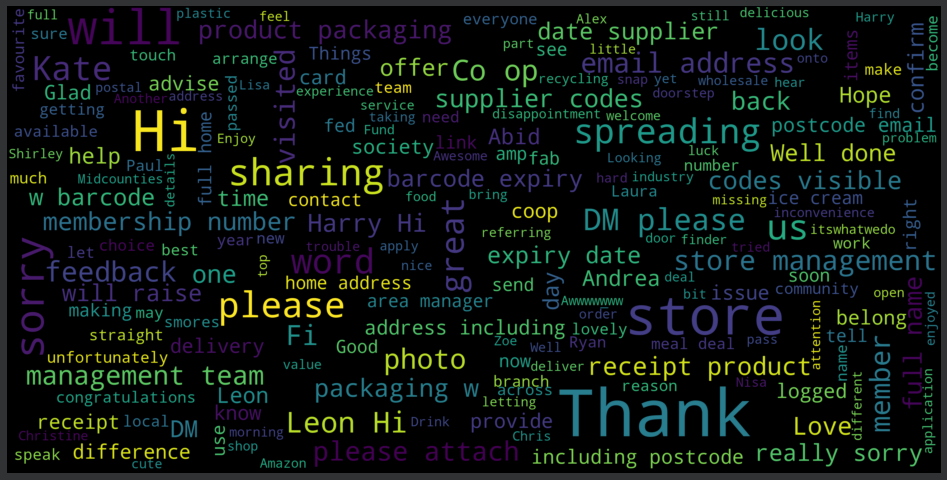

In [442]:
# plot WordCloud
plt.figure(figsize=(20,8))
words = ' '.join([tw for tw in df['Co-op_Tweets']])
word_cloud = WordCloud(width=3000, height=1500, random_state=21, max_font_size=210).generate(words)
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [443]:
# Understand the negative, neutral, positive thought
def analysis(score):
    if score < 0:
        return 'Negative'
    elif score == 0:
        return 'Neutro'
    else:
        return 'Positive'

df['Analysis'] = df['Polarity'].apply(analysis)

df.tail()

,Co-op_Tweets,Subjectivity,Polarity,Analysis
195,Hi there thanks for getting in touch. I'm sor...,0.45625,0.0500,Positive
196,🥳 🎉 \n^,0.00000,0.0000,Neutro
197,"Our higher operating costs, such as higher re...",0.37500,0.1250,Positive
198,"Hi there, our aim is to offer value on everyd...",0.50000,0.0125,Positive
199,"Hi Paul, sorry to hear that If you can select...",0.60000,-0.1500,Negative


In [444]:
# sort the tweets from the positive
countt = 1
sort =df.sort_values(by=['Polarity'])
for i in range(0, sort.shape[0]):
    if (sort['Analysis'][i] == 'Positive'):
        # print(str(countt) + '] ' + sort['Co-op_Tweets'][i]) # uncomment this to see all the text
        countt += 1

In [445]:
# sort the tweets from the negative
counttt = 1
sort =df.sort_values(by=['Polarity'])
for i in range(0, sort.shape[0]):
    if (sort['Analysis'][i] == 'Negative'):
        # print(str(counttt) + '] ' + sort['Co-op_Tweets'][i]) # uncomment this to see all the text
        counttt += 1

## We can see in the below graph that more then 50% of the last 200 tweet have generated positive sentiments

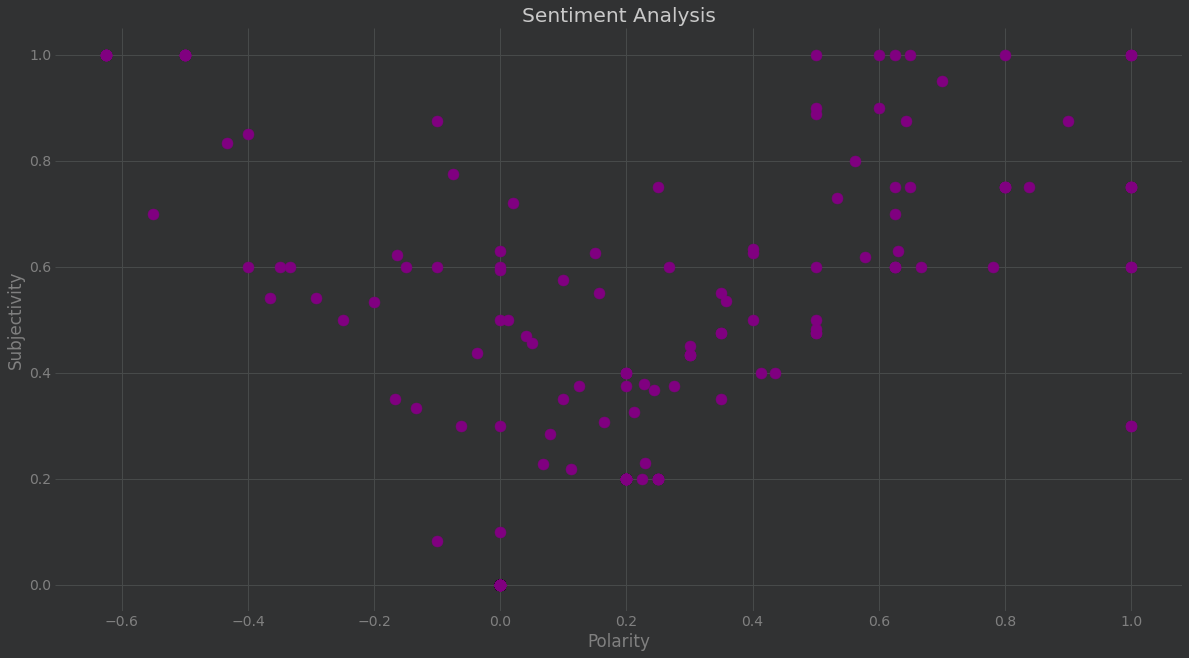

In [446]:
plt.figure(figsize=(18,10))
for i in range(0, df.shape[0]):
    plt.scatter(df['Polarity'][i], df['Subjectivity'][i], color='Purple', marker='o', s=120)

plt.title('Sentiment Analysis')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')
plt.show()

In [447]:
# Get percentage polarity positive
pct_tweets = df[df['Analysis'] == 'Positive']
pct_tweets = pct_tweets['Co-op_Tweets']

POSITIVE_SENTIMENT = round(pct_tweets.shape[0] / df.shape[0] * 100, 2)
POSITIVE_SENTIMENT # in percentage

52.5

In [448]:
# Get percentage polarity neutral
pct_tweets = df[df['Analysis'] == 'Neutro']
pct_tweets = pct_tweets['Co-op_Tweets']

NEUTRAL_SENTIMENT = round(pct_tweets.shape[0] / df.shape[0] * 100, 2)
NEUTRAL_SENTIMENT # in percentage

31.0

In [449]:
# Get percentage polarity negative
pct_tweets = df[df['Analysis'] == 'Negative']
pct_tweets = pct_tweets['Co-op_Tweets']

NEGATIVE_SENTIMENT = round(pct_tweets.shape[0] / df.shape[0] * 100, 2)
NEGATIVE_SENTIMENT # in percentage

16.5

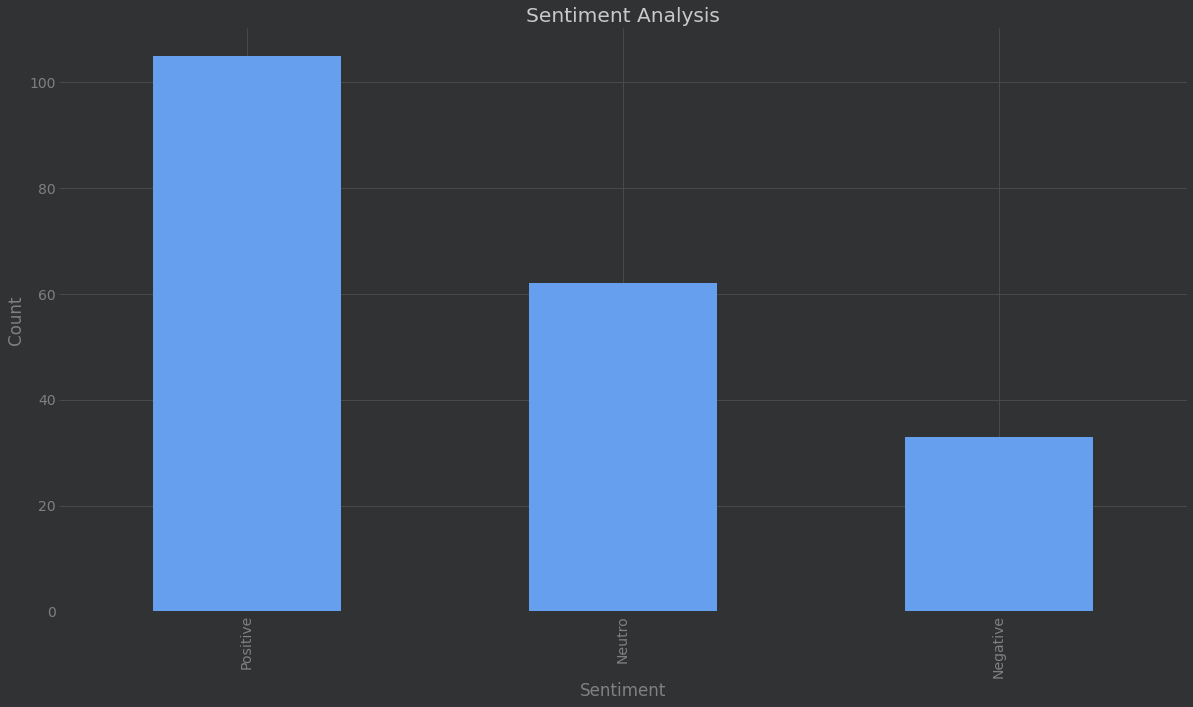

In [450]:
# plot bars
df['Analysis'].value_counts()

plt.figure(figsize=(18,10))
plt.title('Sentiment Analysis')
plt.xlabel('Sentiment')
plt.ylabel('Count')
df['Analysis'].value_counts().plot(kind='bar')
plt.show()